In [6]:

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

digits = datasets.load_digits()


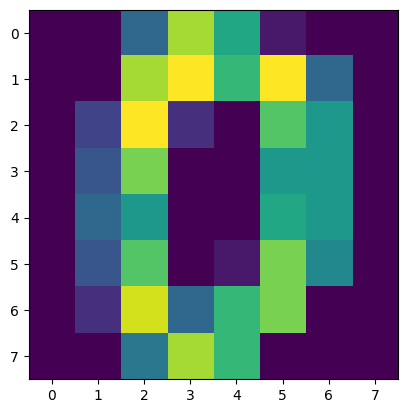

In [21]:
plt.imshow(np.reshape(digits.data[0],(8,8)))

In [ ]:
data = digits.data
m,n = data.shape
data_target = digits.target
x_train = data[0:1200].T
y_train = data_target[0:1200].T
x_test = data[1200:].T
y_test = data_target[1200:].T

In [37]:
x_test.shape, x_train.shape, y_test.shape,y_train.shape

((64, 597), (64, 1200), (597,), (1200,))

In [43]:
def init_params():
    W1 = np.random.rand(10, 64) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z)/sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [40]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [41]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [46]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 1000)

Iteration:  0
[7 6 7 ... 8 7 6] [0 1 2 ... 8 4 1]
0.10583333333333333
Iteration:  10
[0 6 7 ... 6 4 4] [0 1 2 ... 8 4 1]
0.23916666666666667
Iteration:  20
[0 4 7 ... 6 4 4] [0 1 2 ... 8 4 1]
0.3308333333333333
Iteration:  30
[0 4 2 ... 8 4 4] [0 1 2 ... 8 4 1]
0.37416666666666665
Iteration:  40
[0 4 2 ... 8 4 4] [0 1 2 ... 8 4 1]
0.38916666666666666
Iteration:  50
[0 4 2 ... 8 4 4] [0 1 2 ... 8 4 1]
0.3925
Iteration:  60
[0 4 4 ... 8 4 4] [0 1 2 ... 8 4 1]
0.42916666666666664
Iteration:  70
[0 4 4 ... 8 4 4] [0 1 2 ... 8 4 1]
0.4841666666666667
Iteration:  80
[0 4 4 ... 8 4 4] [0 1 2 ... 8 4 1]
0.5141666666666667
Iteration:  90
[0 1 4 ... 8 4 4] [0 1 2 ... 8 4 1]
0.54
Iteration:  100
[0 4 2 ... 8 4 4] [0 1 2 ... 8 4 1]
0.5216666666666666
Iteration:  110
[0 1 4 ... 8 4 4] [0 1 2 ... 8 4 1]
0.555
Iteration:  120
[0 1 2 ... 1 4 1] [0 1 2 ... 8 4 1]
0.5883333333333334
Iteration:  130
[0 1 2 ... 1 4 1] [0 1 2 ... 8 4 1]
0.6341666666666667
Iteration:  140
[0 1 2 ... 1 4 1] [0 1 2 ... 8 4 1]

In [47]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [52]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((8, 8))
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


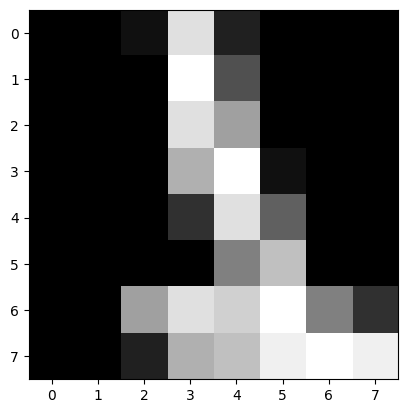

In [55]:
test_prediction(1000, W1, b1, W2, b2)

In [56]:
y_predictions = make_predictions(x_test, W1, b1, W2, b2)
get_accuracy(y_predictions, y_test)

[7 7 9 5 1 0 0 2 2 7 9 2 0 1 2 6 3 3 9 3 3 6 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0
 1 7 6 3 3 1 7 4 6 3 1 3 9 1 7 6 9 4 3 4 4 0 5 3 6 9 6 1 9 5 4 4 7 2 2 2 2
 5 7 9 5 4 8 8 7 9 5 8 9 8 0 9 2 3 4 5 1 7 8 9 0 1 2 3 6 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 6 1 7 7 3 5 1 0 0 2 5 7 8 5 0 1 5 6 3 3
 7 3 3 6 6 6 6 4 9 1 5 0 9 6 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 4 8 6
 3 1 4 0 1 3 1 9 6 1 7 5 4 4 7 5 8 2 2 5 7 9 5 4 1 8 4 9 0 8 0 9 2 3 4 5 6
 7 8 9 0 9 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 3 8 4 1 7
 7 3 5 9 0 0 2 2 7 9 2 0 9 2 6 3 3 7 3 3 4 6 6 6 4 9 9 5 0 3 5 2 9 2 0 0 9
 7 6 3 2 9 7 4 6 3 1 3 9 8 7 6 8 4 3 9 4 0 5 3 6 9 6 9 7 5 4 4 7 2 9 2 2 5
 7 9 5 4 8 8 4 9 0 8 3 8 0 1 2 8 4 5 1 9 1 9 0 1 2 3 4 5 6 7 0 4 8 3 4 5 6
 9 0 7 4 7 5 5 6 5 0 8 8 9 8 4 1 7 7 9 5 1 6 0 2 2 7 8 2 0 4 2 1 8 9 7 8 8
 4 6 6 6 1 9 1 5 6 9 1 2 8 0 1 7 6 3 2 1 7 1 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5
 3 6 9 6 1 7 5 4 4 7 2 2 5 7 8 1 1 4 5 0 1 9 8 0 2 2 3 4 5 6 7 8 9 0 1 2 8
 4 5 6 7 8 9 0 1 2 9 4 7 

np.float64(0.8542713567839196)